### **Predicting Flower Types with Whitebox Model**
---

      1.   Loading Dataset and initializing Dataframe:

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris_sklearn = load_iris()

iris = pd.DataFrame(data=iris_sklearn['data'], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
iris['Species'] = pd.Categorical.from_codes(iris_sklearn.target, iris_sklearn.target_names)

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


      2.   Visualizing the Data:

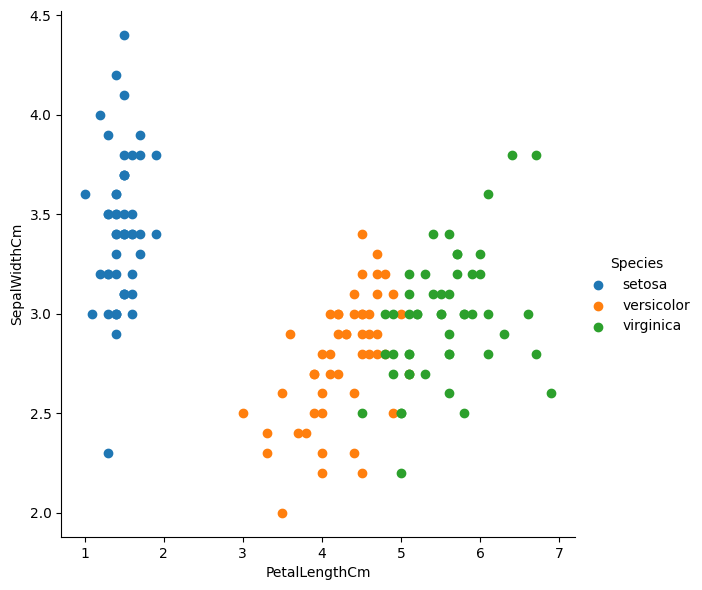

In [45]:
sns.FacetGrid(iris, hue = "Species", height = 6).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()
plt.show()

      3.   Splitting the Data into Training and Testing subsets:

In [46]:
from sklearn.model_selection import train_test_split

X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = iris[["Species"]].values.ravel()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

      4.   Importing and Training Model with Training subset:

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xtrain,ytrain)

LogisticRegression()

      5.   Making Predictions and Scoring Model Accuracy with Testing subset:

In [48]:
from sklearn import metrics

predicted = model.predict(Xtest)

print(metrics.classification_report(ytest, predicted))
print(metrics.confusion_matrix(ytest, predicted))
print("\nAccuracy:", model.score(Xtest, ytest))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Accuracy: 0.9666666666666667
